In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
X = heart.drop(['target','trestbps', 'chol', 'fbs'], axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

## PCA

cumsum: [0.88239964 0.9927002  0.99501828 0.99670655 0.99805561 0.99864398
 0.99910064 0.99944547 0.99975434 1.        ]


Text(0, 0.5, 'cumulative explained variance')

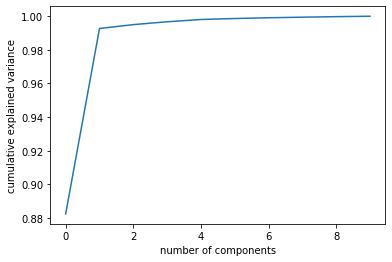

In [4]:
pca = PCA()

pca.fit(X,y)

print(f'cumsum: {np.cumsum(pca.explained_variance_ratio_)}')

pca = PCA().fit(X,y)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))

R-Squared for Train set: 0.486
R-Squared for test set: 0.589


## LogisticRegression

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {'max_iter' : [10,100,1000,10000],
             'C' : [0.01,0.1,1,10,50,100]}

clf = GridSearchCV(LogisticRegression(),params)

clf.fit(X_train,y_train)

print(f'{clf.best_estimator_}')

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [17]:
logreg = LogisticRegression(C=10, max_iter=1000)
logreg.fit(X_train,y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test, y_test)))

R-Squared for Train set: 0.835
R-Squared for test set: 0.885


## KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors' : range(1,50),
             'weights' : ['uniform','distance']}

clf2 = GridSearchCV(KNeighborsClassifier(),params)

clf2.fit(X_train,y_train)

print(f'{clf2.best_estimator_}')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')


In [20]:
knn = KNeighborsClassifier(weights='distance',n_neighbors=5)

knn.fit(X_train,y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(knn.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(knn.score(X_test, y_test)))

R-Squared for Train set: 1.000
R-Squared for test set: 0.656


## LinearSVC

In [21]:
from sklearn.svm import LinearSVC

params = {'max_iter' : [10,100,1000,10000],
             'C' : [0.01,0.1,1,10,50,100]}

clf2 = GridSearchCV(LinearSVC(),params)

clf2.fit(X_train,y_train)

print(f'{clf2.best_estimator_}')

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [22]:
svc = LinearSVC(C=0.01,max_iter=1000)

svc.fit(X_train,y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(svc.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(svc.score(X_test, y_test)))

R-Squared for Train set: 0.831
R-Squared for test set: 0.902


## DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : range(1,50),
         'min_samples_split': [0.001,0.01,0.05],'min_samples_leaf':[0.001,0.01,0.05],
         'ccp_alpha': [0,0.001,0.01,0.1,0.5]}

clf = GridSearchCV(DecisionTreeClassifier(),params)

clf.fit(X_train,y_train)

print(f'{clf.best_estimator_}')

DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.05, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [24]:
dtree = DecisionTreeClassifier(max_depth=3,min_samples_split=0.01,min_samples_leaf=0.05,ccp_alpha=0)

dtree.fit(X_train,y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(dtree.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(dtree.score(X_test, y_test)))

R-Squared for Train set: 0.826
R-Squared for test set: 0.803


## RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators' : [10,50,100,200,500,1000],
             'max_depth' : range(1,20)}

clf2 = GridSearchCV(RandomForestClassifier(),params)

clf2.fit(X_train,y_train)

print(f'{clf2.best_estimator_}')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [26]:
randomforest = RandomForestClassifier(n_estimators=200,max_depth=4)

randomforest.fit(X_train,y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(randomforest.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(randomforest.score(X_test, y_test)))

R-Squared for Train set: 0.893
R-Squared for test set: 0.885


In [27]:
print("Linear Regression: R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("Linear Regression: R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))

print("Logistic Regression: R-Squared for Train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression: R-Squared for test set: {:.3f}" .format(logreg.score(X_test, y_test)))

print("KNN Regression: R-Squared for Train set: {:.3f}".format(knn.score(X_train, y_train)))
print("KNN Regression: R-Squared for test set: {:.3f}" .format(knn.score(X_test, y_test)))

print("SVC: R-Squared for Train set: {:.3f}".format(svc.score(X_train, y_train)))
print("SVC: R-Squared for test set: {:.3f}" .format(svc.score(X_test, y_test)))

print("Decision Tree: R-Squared for Train set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Decision Tree: R-Squared for test set: {:.3f}" .format(dtree.score(X_test, y_test)))

print("Random Forest: R-Squared for Train set: {:.3f}".format(randomforest.score(X_train, y_train)))
print("Random Forest: R-Squared for test set: {:.3f}" .format(randomforest.score(X_test, y_test)))

Linear Regression: R-Squared for Train set: 0.486
Linear Regression: R-Squared for test set: 0.589
Logistic Regression: R-Squared for Train set: 0.835
Logistic Regression: R-Squared for test set: 0.885
KNN Regression: R-Squared for Train set: 1.000
KNN Regression: R-Squared for test set: 0.656
SVC: R-Squared for Train set: 0.831
SVC: R-Squared for test set: 0.902
Decision Tree: R-Squared for Train set: 0.826
Decision Tree: R-Squared for test set: 0.803
Random Forest: R-Squared for Train set: 0.893
Random Forest: R-Squared for test set: 0.885


In [32]:
from sklearn.model_selection import cross_val_score


for clf, label in zip([linreg, logreg, knn, svc,dtree,randomforest], ['Linear Regression','Logistic Regression','KNN', 'SVC','Decision Tree','Random Forest']):
    scores_train = cross_val_score(clf, X_train, y_train, cv=5)
    scores_test = cross_val_score(clf, X_test, y_test, cv=5)
    print("Accuracy train: %0.2f (+/- %0.2f) [%s]" % (scores_train.mean(), scores_train.std(), label))
    print("Accuracy test: %0.2f (+/- %0.2f) [%s]" % (scores_test.mean(), scores_test.std(), label))

Accuracy train: 0.40 (+/- 0.13) [Linear Regression]
Accuracy test: 0.40 (+/- 0.17) [Linear Regression]
Accuracy train: 0.81 (+/- 0.04) [Logistic Regression]
Accuracy test: 0.82 (+/- 0.06) [Logistic Regression]
Accuracy train: 0.70 (+/- 0.03) [KNN]
Accuracy test: 0.77 (+/- 0.08) [KNN]
Accuracy train: 0.80 (+/- 0.04) [SVC]
Accuracy test: 0.87 (+/- 0.07) [SVC]
Accuracy train: 0.75 (+/- 0.06) [Decision Tree]
Accuracy test: 0.80 (+/- 0.04) [Decision Tree]
Accuracy train: 0.82 (+/- 0.04) [Random Forest]
Accuracy test: 0.85 (+/- 0.03) [Random Forest]


## Support Vector Classifier is the winner here